In [1]:
import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
import keras

Using plaidml.keras.backend backend.


In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam

from keras import initializers

In [3]:
# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

In [4]:
# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

In [5]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train.reshape(60000, 784)

In [6]:
# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

INFO:plaidml:Opening device "opencl_amd_gfx1010:xnack-.0"


In [7]:
# define generator
generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

In [8]:
# define discriminator
discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

In [9]:
# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

In [25]:
dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('C:/Users/jiahu/models/images/gan_loss_epoch_%d.png' % epoch)

In [26]:
# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('C:/Users/jiahu/models/images/gan_generated_image_epoch_%d.png' % epoch)

In [27]:
# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('C:/Users/jiahu/models/gan_generator_epoch_%d.h5' % epoch)
    discriminator.save('C:/Users/jiahu/models/models/gan_discriminator_epoch_%d.h5' % epoch)

  1%|▉                                                                                 | 5/468 [00:00<00:09, 47.21it/s]

Epochs: 200
Batch size: 128
Batches per epoch: 468.75
Epoch 1 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.21it/s]

Epoch 2 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.24it/s]

Epoch 3 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.31it/s]

Epoch 4 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.02it/s]

Epoch 5 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.73it/s]

Epoch 6 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.65it/s]

Epoch 7 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.03it/s]

Epoch 8 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.40it/s]

Epoch 9 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.42it/s]

Epoch 10 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.26it/s]

Epoch 11 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.38it/s]

Epoch 12 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.32it/s]

Epoch 13 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 47.07it/s]

Epoch 14 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 47.54it/s]

Epoch 15 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.67it/s]

Epoch 16 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.07it/s]

Epoch 17 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.18it/s]

Epoch 18 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.30it/s]

Epoch 19 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.17it/s]

Epoch 20 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.75it/s]

Epoch 21 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.50it/s]

Epoch 22 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.47it/s]

Epoch 23 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.76it/s]

Epoch 24 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.36it/s]

Epoch 25 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.65it/s]

Epoch 26 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.04it/s]

Epoch 27 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.50it/s]

Epoch 28 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.63it/s]

Epoch 29 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.21it/s]

Epoch 30 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 47.75it/s]

Epoch 31 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 47.39it/s]

Epoch 32 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.09it/s]

Epoch 33 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.15it/s]

Epoch 34 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.36it/s]

Epoch 35 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.44it/s]

Epoch 36 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 48.04it/s]

Epoch 37 



  1%|█                                                                                 | 6/468 [00:00<00:09, 51.12it/s]

Epoch 38 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.56it/s]

Epoch 39 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.92it/s]

Epoch 40 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.90it/s]

Epoch 41 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.46it/s]

Epoch 42 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.41it/s]

Epoch 43 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.70it/s]

Epoch 44 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.63it/s]

Epoch 45 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.23it/s]

Epoch 46 



  1%|█                                                                                 | 6/468 [00:00<00:09, 49.89it/s]

Epoch 47 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.87it/s]

Epoch 48 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 48.73it/s]

Epoch 49 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.74it/s]

Epoch 50 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.35it/s]

Epoch 51 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 48.67it/s]

Epoch 52 



  1%|█                                                                                 | 6/468 [00:00<00:08, 51.54it/s]

Epoch 53 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.02it/s]

Epoch 54 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.22it/s]

Epoch 55 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.17it/s]

Epoch 56 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.99it/s]

Epoch 57 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.62it/s]

Epoch 58 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.46it/s]

Epoch 59 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.80it/s]

Epoch 60 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.63it/s]

Epoch 61 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.24it/s]

Epoch 62 



  1%|█                                                                                 | 6/468 [00:00<00:09, 51.08it/s]

Epoch 63 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.96it/s]

Epoch 64 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.58it/s]

Epoch 65 



  1%|█                                                                                 | 6/468 [00:00<00:09, 49.87it/s]

Epoch 66 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.61it/s]

Epoch 67 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.86it/s]

Epoch 68 



  1%|█                                                                                 | 6/468 [00:00<00:08, 51.34it/s]

Epoch 69 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.39it/s]

Epoch 70 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.74it/s]

Epoch 71 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.78it/s]

Epoch 72 



  1%|█                                                                                 | 6/468 [00:00<00:09, 51.09it/s]

Epoch 73 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.54it/s]

Epoch 74 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.15it/s]

Epoch 75 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.39it/s]

Epoch 76 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.49it/s]

Epoch 77 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.50it/s]

Epoch 78 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.75it/s]

Epoch 79 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.53it/s]

Epoch 80 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.56it/s]

Epoch 81 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.88it/s]

Epoch 82 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.68it/s]

Epoch 83 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.59it/s]

Epoch 84 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.84it/s]

Epoch 85 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.98it/s]

Epoch 86 



  1%|█                                                                                 | 6/468 [00:00<00:09, 51.01it/s]

Epoch 87 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.49it/s]

Epoch 88 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.46it/s]

Epoch 89 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.67it/s]

Epoch 90 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.54it/s]

Epoch 91 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.09it/s]

Epoch 92 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.47it/s]

Epoch 93 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.34it/s]

Epoch 94 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.53it/s]

Epoch 95 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.37it/s]

Epoch 96 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.43it/s]

Epoch 97 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.32it/s]

Epoch 98 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.15it/s]

Epoch 99 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 48.70it/s]

Epoch 100 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.46it/s]

Epoch 101 



  2%|█▉                                                                               | 11/468 [00:00<00:09, 50.49it/s]

Epoch 102 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.36it/s]

Epoch 103 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.41it/s]

Epoch 104 



  1%|█                                                                                 | 6/468 [00:00<00:09, 51.23it/s]

Epoch 105 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.42it/s]

Epoch 106 



  1%|█                                                                                 | 6/468 [00:00<00:09, 51.31it/s]

Epoch 107 



  1%|█                                                                                 | 6/468 [00:00<00:08, 51.52it/s]

Epoch 108 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.72it/s]

Epoch 109 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.79it/s]

Epoch 110 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.30it/s]

Epoch 111 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.76it/s]

Epoch 112 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.20it/s]

Epoch 113 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.48it/s]

Epoch 114 



  1%|▉                                                                                 | 5/468 [00:00<00:10, 46.25it/s]

Epoch 115 



  1%|█                                                                                 | 6/468 [00:00<00:09, 49.92it/s]

Epoch 116 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.31it/s]

Epoch 117 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.65it/s]

Epoch 118 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.95it/s]

Epoch 119 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 47.58it/s]

Epoch 120 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.23it/s]

Epoch 121 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.20it/s]

Epoch 122 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 50.00it/s]

Epoch 123 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.53it/s]

Epoch 124 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.90it/s]

Epoch 125 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.38it/s]

Epoch 126 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.48it/s]

Epoch 127 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.22it/s]

Epoch 128 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.21it/s]

Epoch 129 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.45it/s]

Epoch 130 



  1%|█                                                                                 | 6/468 [00:00<00:09, 49.90it/s]

Epoch 131 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.70it/s]

Epoch 132 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.59it/s]

Epoch 133 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.89it/s]

Epoch 134 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.11it/s]

Epoch 135 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.72it/s]

Epoch 136 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.32it/s]

Epoch 137 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.12it/s]

Epoch 138 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.66it/s]

Epoch 139 



  1%|█                                                                                 | 6/468 [00:00<00:08, 51.35it/s]

Epoch 140 



  1%|█                                                                                 | 6/468 [00:00<00:09, 51.15it/s]

Epoch 141 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.62it/s]

Epoch 142 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.55it/s]

Epoch 143 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.89it/s]

Epoch 144 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.22it/s]

Epoch 145 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.47it/s]

Epoch 146 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.57it/s]

Epoch 147 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.83it/s]

Epoch 148 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.12it/s]

Epoch 149 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.33it/s]

Epoch 150 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.38it/s]

Epoch 151 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.37it/s]

Epoch 152 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.30it/s]

Epoch 153 



  1%|█                                                                                 | 6/468 [00:00<00:09, 51.11it/s]

Epoch 154 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.60it/s]

Epoch 155 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.22it/s]

Epoch 156 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.71it/s]

Epoch 157 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.52it/s]

Epoch 158 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 48.79it/s]

Epoch 159 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.31it/s]

Epoch 160 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.40it/s]

Epoch 161 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.96it/s]

Epoch 162 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.20it/s]

Epoch 163 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.42it/s]

Epoch 164 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.73it/s]

Epoch 165 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.82it/s]

Epoch 166 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.10it/s]

Epoch 167 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.92it/s]

Epoch 168 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.98it/s]

Epoch 169 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.33it/s]

Epoch 170 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.08it/s]

Epoch 171 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.38it/s]

Epoch 172 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.97it/s]

Epoch 173 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.79it/s]

Epoch 174 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 47.13it/s]

Epoch 175 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.22it/s]

Epoch 176 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.86it/s]

Epoch 177 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.53it/s]

Epoch 178 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.71it/s]

Epoch 179 



  1%|█                                                                                 | 6/468 [00:00<00:09, 49.94it/s]

Epoch 180 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.94it/s]

Epoch 181 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.78it/s]

Epoch 182 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.60it/s]

Epoch 183 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.46it/s]

Epoch 184 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.46it/s]

Epoch 185 



  2%|█▋                                                                               | 10/468 [00:00<00:09, 49.47it/s]

Epoch 186 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.49it/s]

Epoch 187 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.98it/s]

Epoch 188 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.48it/s]

Epoch 189 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.09it/s]

Epoch 190 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.31it/s]

Epoch 191 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.46it/s]

Epoch 192 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.95it/s]

Epoch 193 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.92it/s]

Epoch 194 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.29it/s]

Epoch 195 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 49.91it/s]

Epoch 196 



  1%|▉                                                                                 | 5/468 [00:00<00:09, 48.48it/s]

Epoch 197 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.13it/s]

Epoch 198 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.19it/s]

Epoch 199 



  1%|█                                                                                 | 6/468 [00:00<00:09, 50.64it/s]

Epoch 200 



100%|████████████████████████████████████████████████████████████████████████████████| 468/468 [00:09<00:00, 49.65it/s]


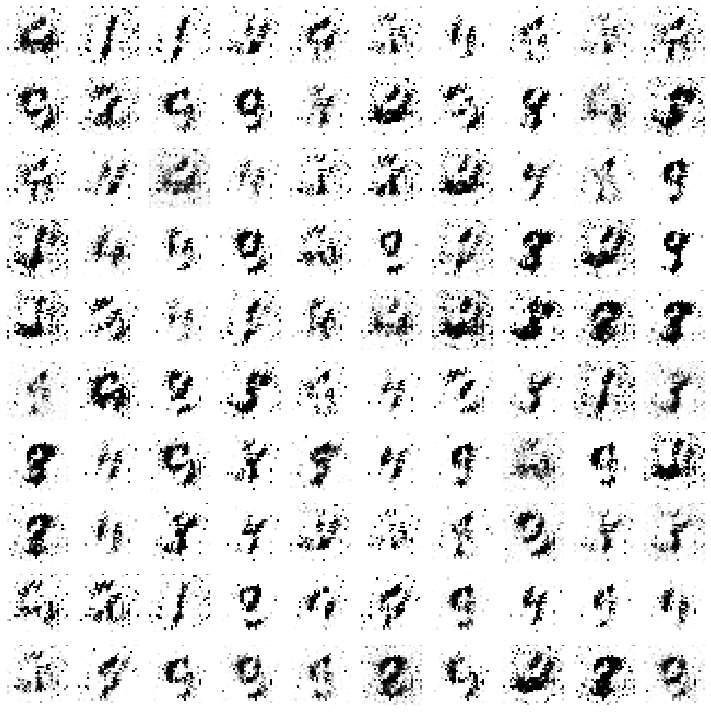

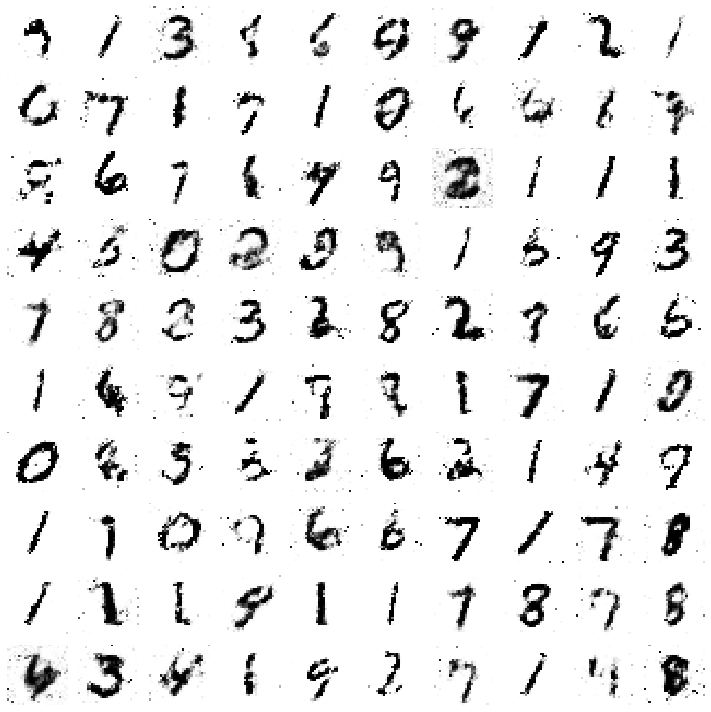

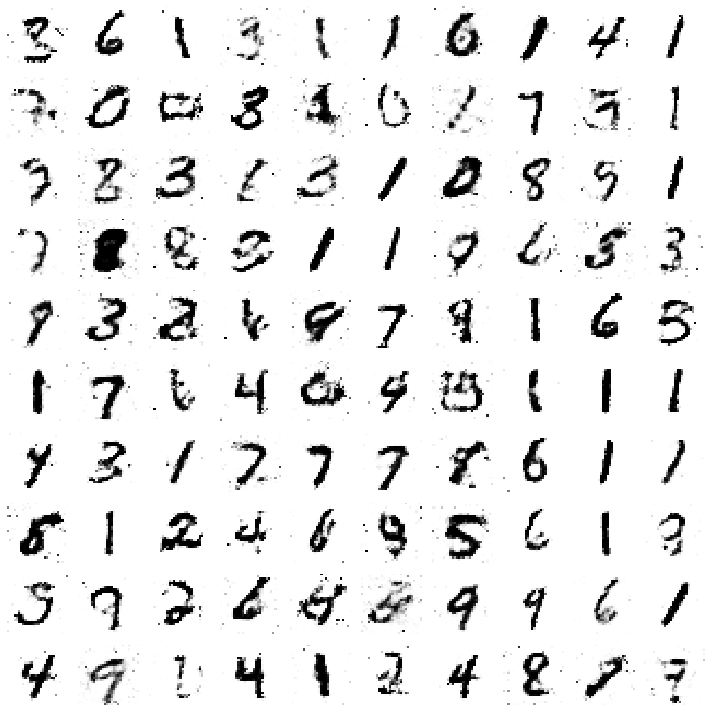

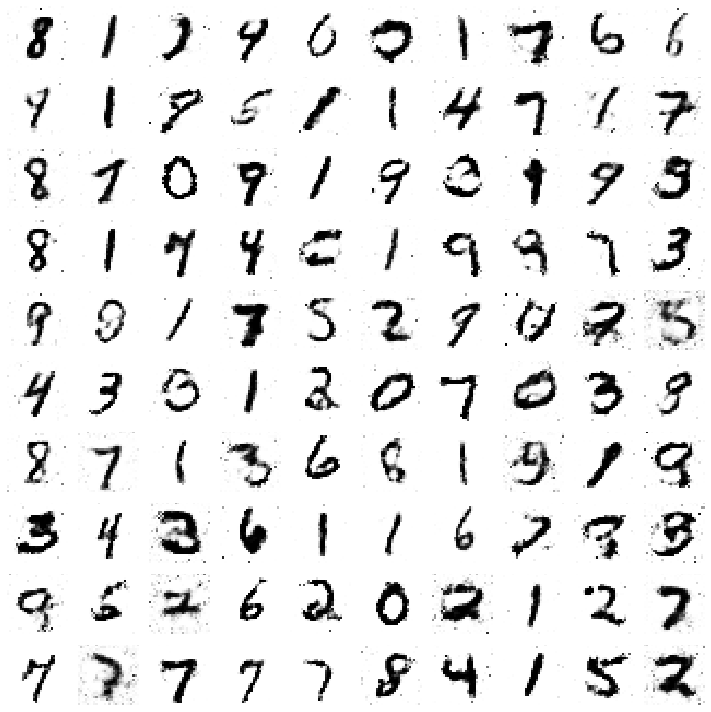

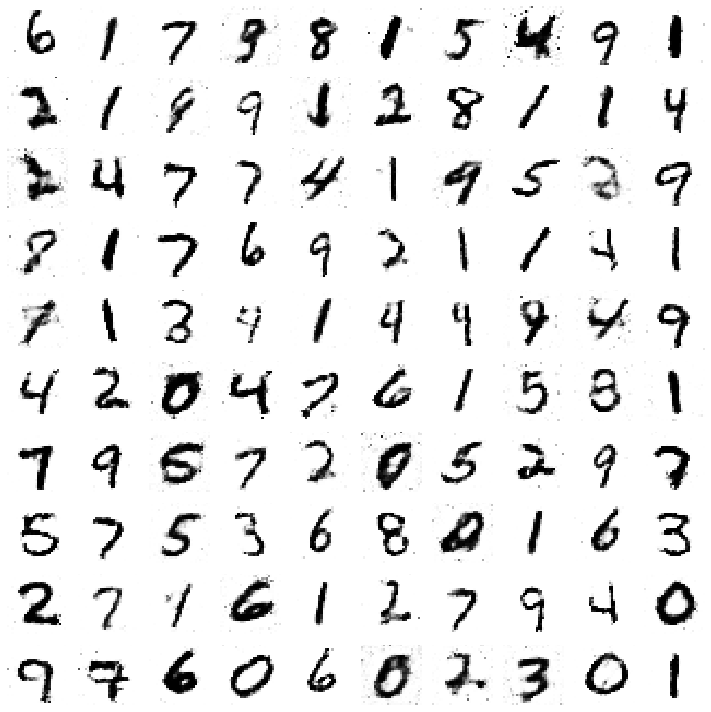

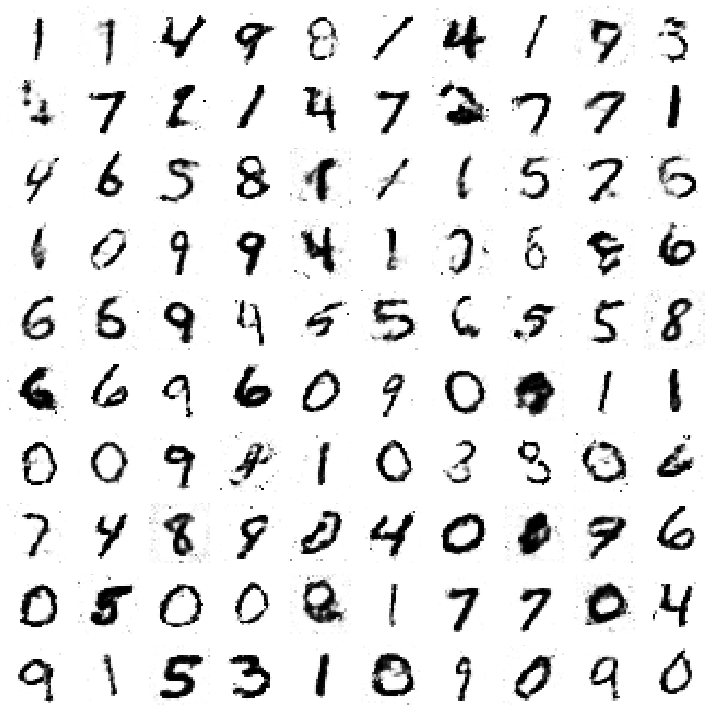

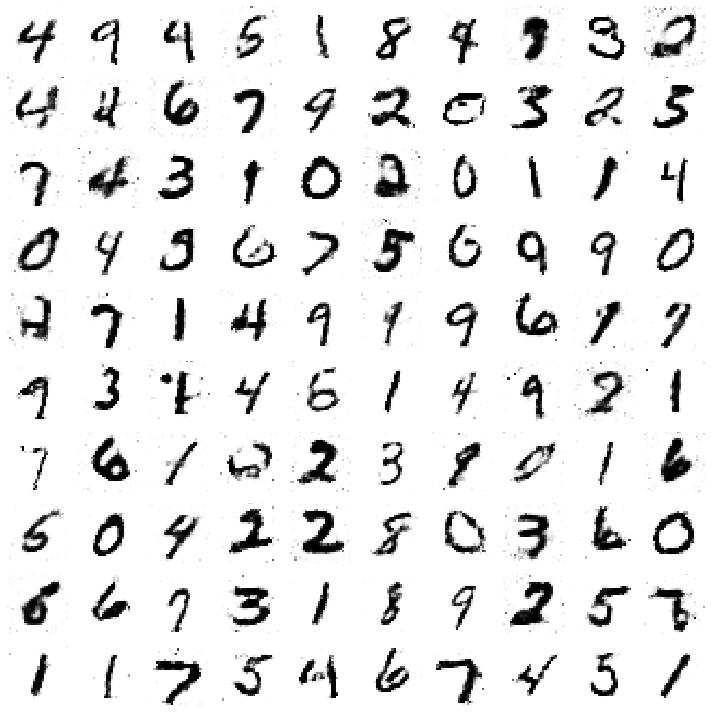

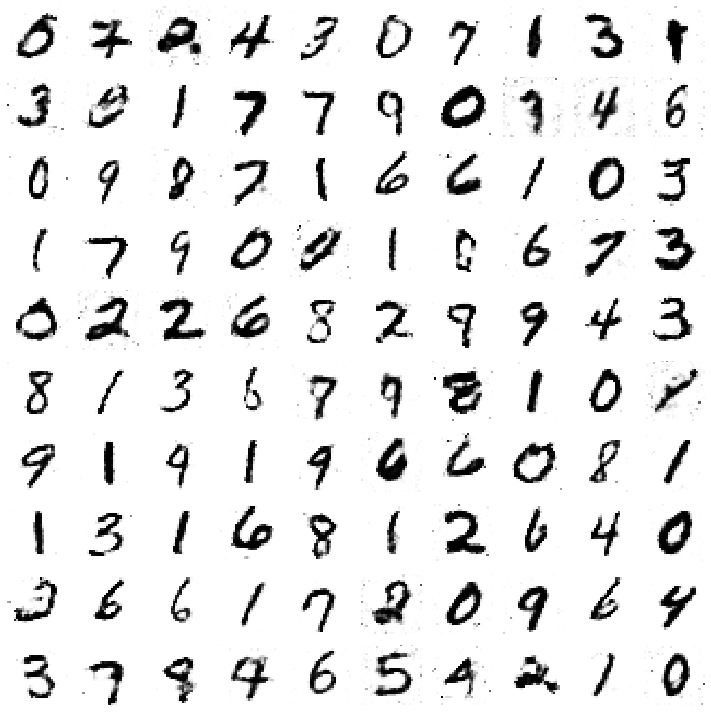

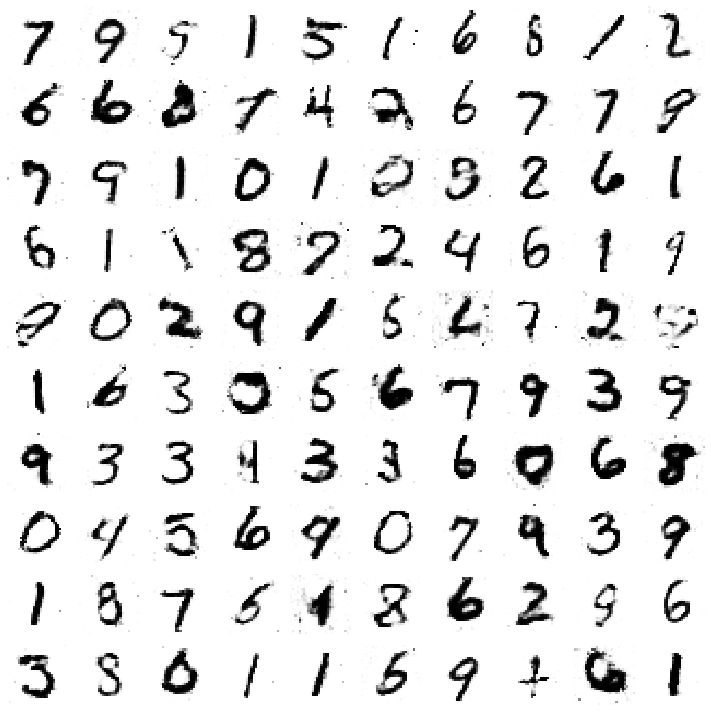

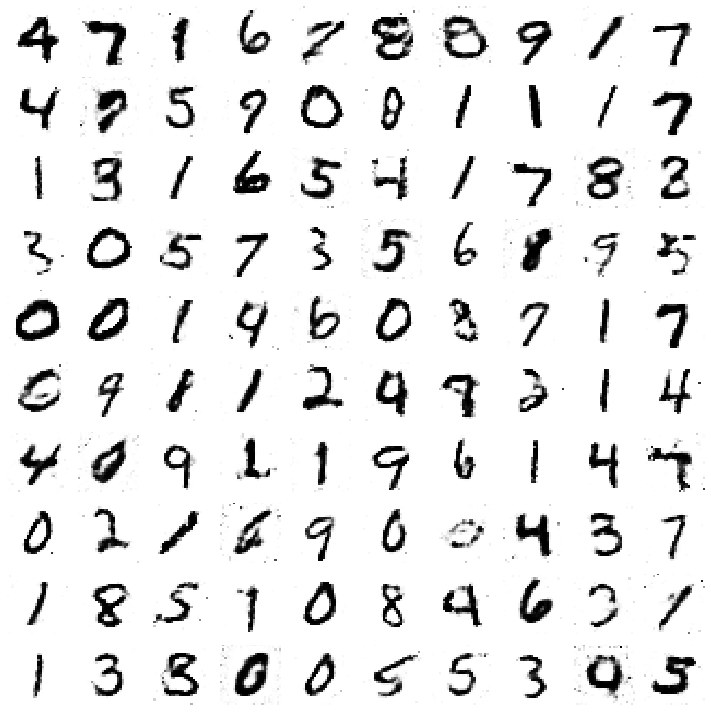

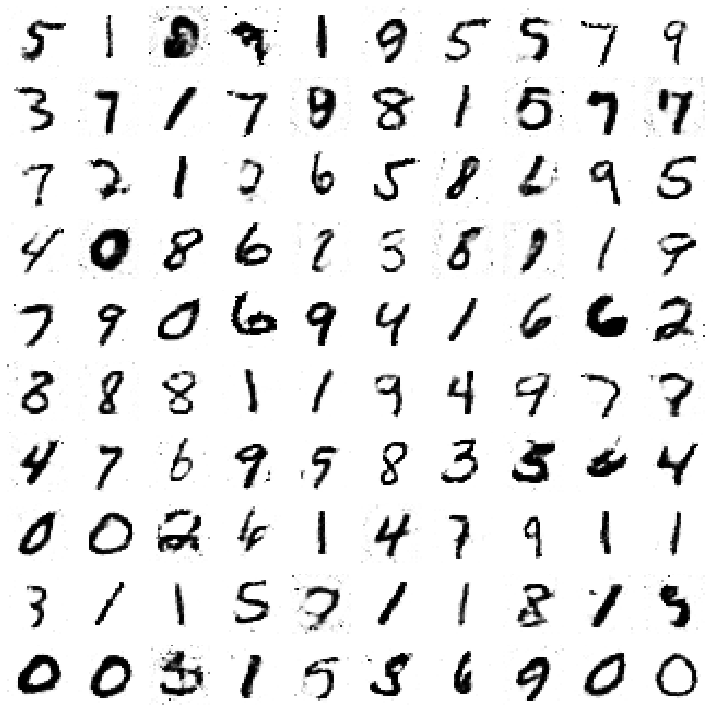

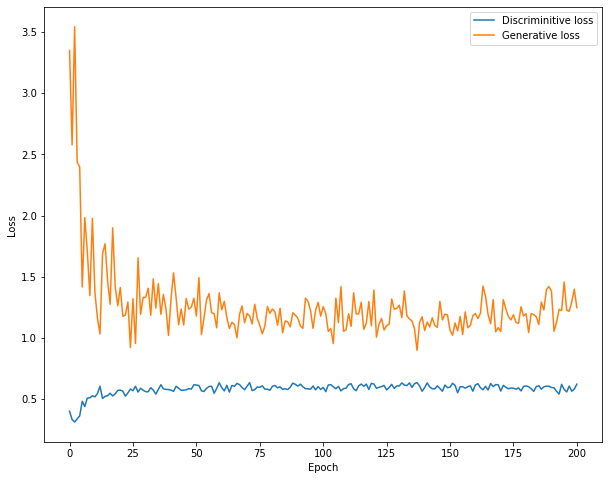

In [29]:
def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] / batchSize
    print('Epochs:', epochs)
    print('Batch size:', batchSize) 
    print('Batches per epoch:', batchCount) 

    for e in range(1, epochs+1):
        print(f"Epoch {e} \n")
        for _ in tqdm(range(int(batchCount))):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            # print np.shape(imageBatch), np.shape(generatedImages)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 20 == 0:
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)

if __name__ == '__main__':
    train(200, 128)